# Setting Up the Environment

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set visualization styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the SuperStore Sales Data
df = pd.read_csv('superstore_sales.csv')

# Display the first few rows to understand the data structure
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Zip Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Profit
0,6683,CA-2018-154466,8/11/2017,11/11/2017,First Class,DP-13390,Dennis Pardue,Home Office,53132.0,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,0.373340
1,8075,CA-2018-151750,8/11/2017,11/11/2017,Standard Class,JM-15250,Janet Martin,Consumer,77340.0,Central,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",13.748,4.465658
2,8074,CA-2018-151750,12/6/2017,16/06/2017,Standard Class,JM-15250,Janet Martin,Consumer,77340.0,Central,OFF-BI-10000301,Office Supplies,Binders,GBC Instant Report Kit,6.470,1.078328
3,8076,CA-2018-151750,11/10/2016,18/10/2016,Standard Class,JM-15250,Janet Martin,Consumer,77340.0,Central,OFF-AP-10004708,Office Supplies,Appliances,Fellowes Superior 10 Outlet Split Surge Protector,15.224,2.636794
4,849,CA-2018-107503,11/10/2016,18/10/2016,Standard Class,GA-14725,GUY ARMSTRONG,Consumer,44052.0,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,8.890273


# Initial Data Overview

In [32]:
# Check the shape of the dataset (rows, columns)
print(f"Dataset dimensions: {df.shape}")

# Look at data types and basic statistics
df.info()
df.describe()

Dataset dimensions: (9774, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9774 entries, 0 to 9773
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9774 non-null   int64  
 1   Order ID       9774 non-null   object 
 2   Order Date     9774 non-null   object 
 3   Ship Date      9774 non-null   object 
 4   Ship Mode      9774 non-null   object 
 5   Customer ID    9774 non-null   object 
 6   Customer Name  9774 non-null   object 
 7   Segment        9774 non-null   object 
 8   Zip Code       9763 non-null   float64
 9   Region         9309 non-null   object 
 10  Product ID     9774 non-null   object 
 11  Category       9774 non-null   object 
 12  Sub-Category   9774 non-null   object 
 13  Product Name   9774 non-null   object 
 14  Sales          9774 non-null   float64
 15  Profit         9774 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory usage: 1.2+ MB


,Row ID,Zip Code,Sales,Profit
count,9774.000000,9763.000000,9774.000000,9774.000000
mean,4899.005934,55259.589470,230.822142,35.028942
std,2830.872985,32054.585045,626.831995,121.059576
min,1.000000,1040.000000,0.444000,-343.151579
25%,2449.250000,23223.000000,17.280000,1.145748
50%,4893.500000,57701.000000,54.740000,5.402215
75%,7352.750000,90008.000000,210.576000,25.665092
max,9800.000000,99301.000000,22638.480000,4390.715995


# Basic Data Assessment

In [35]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Fix date columns by converting to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)  # DMY format
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)    # DMY format

Missing values in each column:
Zip Code     11
Region      465
dtype: int64

Number of duplicate rows: 0


# Data Cleaning

In [38]:
# Remove rows with missing Region values
df_clean = df.dropna(subset=['Region', 'Zip Code'])

# Remove duplicate rows
df_clean = df_clean.drop_duplicates()

# Format Sales and Profit columns to two decimal places
df_clean['Sales'] = df_clean['Sales'].round(2)
df_clean['Profit'] = df_clean['Profit'].round(2)

# Sort data by Region and Sales (descending)
df_clean = df_clean.sort_values(['Region', 'Sales'], ascending=[True, False])

In [40]:
df_clean.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Zip Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Profit
546,6827,CA-2017-118689,2017-06-10,2017-06-15,Standard Class,TC-20980,tamara chand,Corporate,47905.0,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,3002.92
5454,9040,CA-2017-117121,2018-10-08,2018-10-14,Standard Class,AB-10105,Adrian Barton,Consumer,48205.0,Central,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.74,2623.40
7375,4099,CA-2015-116904,2016-05-14,2016-05-19,Standard Class,SC-20095,SANJIT CHAND,Consumer,55407.0,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.95,1254.19
2456,166,CA-2015-139892,2018-06-19,2018-06-25,Standard Class,BM-11140,BECKY MARTIN,Consumer,78207.0,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.95,2179.65
4867,6521,CA-2018-138289,2017-12-23,2017-12-30,Second Class,AR-10540,Andy Reiter,Consumer,49201.0,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,5443.96,813.51


# Filtering Techniques

In [43]:
# Filter to show only the East region
east_region = df_clean[df_clean['Region'] == 'East']

# Filter to show sales above average
average_sales = df_clean['Sales'].mean()
high_sales = df_clean[df_clean['Sales'] > average_sales]

# Complex filter: East region with sales above average
east_high_sales = df_clean[(df_clean['Region'] == 'East') & 
                           (df_clean['Sales'] > average_sales)]

In [45]:
east_region.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Zip Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Profit
7101,2624,CA-2018-127180,2017-04-16,2017-04-22,First Class,TA-21385,Tom Ashbrook,Home Office,10024.0,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.97,664.16
5436,4191,CA-2018-166709,2015-01-19,2015-01-20,Standard Class,HL-15040,Hunter Lopez,Consumer,19711.0,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.97,1783.31
4936,4278,US-2017-107440,2016-05-25,2016-05-28,Standard Class,BS-11365,Bill Shonely,Corporate,8701.0,East,TEC-MA-10001047,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.93,2695.58
7263,6426,CA-2017-143714,2018-12-04,2018-12-09,Standard Class,CC-12370,Christopher Conant,Consumer,19120.0,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.98,1171.77
4558,6627,CA-2015-145541,2018-11-02,2018-11-04,Standard Class,TB-21400,Tom Boeckenhauer,Consumer,10024.0,East,TEC-MA-10001127,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,6999.96,2153.87


In [47]:
high_sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Zip Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Profit
546,6827,CA-2017-118689,2017-06-10,2017-06-15,Standard Class,TC-20980,tamara chand,Corporate,47905.0,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,3002.92
5454,9040,CA-2017-117121,2018-10-08,2018-10-14,Standard Class,AB-10105,Adrian Barton,Consumer,48205.0,Central,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.74,2623.40
7375,4099,CA-2015-116904,2016-05-14,2016-05-19,Standard Class,SC-20095,SANJIT CHAND,Consumer,55407.0,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.95,1254.19
2456,166,CA-2015-139892,2018-06-19,2018-06-25,Standard Class,BM-11140,BECKY MARTIN,Consumer,78207.0,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.95,2179.65
4867,6521,CA-2018-138289,2017-12-23,2017-12-30,Second Class,AR-10540,Andy Reiter,Consumer,49201.0,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,5443.96,813.51


In [49]:
east_high_sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Zip Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Profit
7101,2624,CA-2018-127180,2017-04-16,2017-04-22,First Class,TA-21385,Tom Ashbrook,Home Office,10024.0,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.97,664.16
5436,4191,CA-2018-166709,2015-01-19,2015-01-20,Standard Class,HL-15040,Hunter Lopez,Consumer,19711.0,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.97,1783.31
4936,4278,US-2017-107440,2016-05-25,2016-05-28,Standard Class,BS-11365,Bill Shonely,Corporate,8701.0,East,TEC-MA-10001047,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.93,2695.58
7263,6426,CA-2017-143714,2018-12-04,2018-12-09,Standard Class,CC-12370,Christopher Conant,Consumer,19120.0,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.98,1171.77
4558,6627,CA-2015-145541,2018-11-02,2018-11-04,Standard Class,TB-21400,Tom Boeckenhauer,Consumer,10024.0,East,TEC-MA-10001127,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,6999.96,2153.87


# 2. Data Transformation
## Creating Calculated Columns

In [52]:
# Add Profit Margin % column
df_clean['Profit Margin %'] = (df_clean['Profit'] / df_clean['Sales']).round(4)

# Calculate Days to Ship
df_clean['Days to Ship'] = (df_clean['Ship Date'] - df_clean['Order Date']).dt.days

In [54]:
# Load the zip code data
zip_data = pd.read_csv('zip_codes.csv')

# Convert zip codes to strings in both dataframes to ensure proper matching
zip_data['Zip Code'] = zip_data['Zip Code'].astype(int)
df_clean['Zip Code'] = df_clean['Zip Code'].astype(int)

# Merge the datasets on the Zip Code column
# left_join keeps all rows from df_clean even if there's no matching zip code
df_clean = df_clean.merge(
    zip_data[['Zip Code', 'City', 'State']], 
    on='Zip Code', 
    how='left'
)

# Fill any missing values after the merge with 'Unknown'
df_clean['City'] = df_clean['City'].fillna('Unknown')
df_clean['State'] = df_clean['State'].fillna('Unknown')

# Display the new columns
df_clean[['Sales', 'Profit', 'Profit Margin %', 'Days to Ship', 'City', 'State']].head()

,Sales,Profit,Profit Margin %,Days to Ship,City,State
0,17499.95,3002.92,0.1716,5,Lafayette,IN
1,9892.74,2623.40,0.2652,6,Detroit,MI
2,9449.95,1254.19,0.1327,5,Minneapolis,MN
3,8159.95,2179.65,0.2671,6,San Antonio,TX
4,5443.96,813.51,0.1494,7,Jackson,MI


# Conditional Analysis (Python's version of Conditional Formatting)

In [57]:
# Create a function to highlight profit margins
def profit_margin_category(margin):
    if margin > 0.20:
        return 'High'
    elif margin > 0.05:
        return 'Medium'
    else:
        return 'Low'

# Apply the function to create a new column
df_clean['Margin Category'] = df_clean['Profit Margin %'].apply(profit_margin_category)

# Create shipping efficiency categories
def shipping_efficiency(days):
    if days <= 3:
        return 'Fast'
    elif days <= 5:
        return 'Medium'
    else:
        return 'Slow'

df_clean['Shipping Speed'] = df_clean['Days to Ship'].apply(shipping_efficiency)

# Identify sales above/below average
df_clean['Sales Performance'] = np.where(
    df_clean['Sales'] > df_clean['Sales'].mean(), 
    'Above Average', 
    'Below Average'
)

In [59]:
df_clean.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Zip Code,Region,...,Product Name,Sales,Profit,Profit Margin %,Days to Ship,City,State,Margin Category,Shipping Speed,Sales Performance
0,6827,CA-2017-118689,2017-06-10,2017-06-15,Standard Class,TC-20980,tamara chand,Corporate,47905,Central,...,Canon imageCLASS 2200 Advanced Copier,17499.95,3002.92,0.1716,5,Lafayette,IN,Medium,Medium,Above Average
1,9040,CA-2017-117121,2018-10-08,2018-10-14,Standard Class,AB-10105,Adrian Barton,Consumer,48205,Central,...,GBC Ibimaster 500 Manual ProClick Binding System,9892.74,2623.40,0.2652,6,Detroit,MI,High,Slow,Above Average
2,4099,CA-2015-116904,2016-05-14,2016-05-19,Standard Class,SC-20095,SANJIT CHAND,Consumer,55407,Central,...,Ibico EPK-21 Electric Binding System,9449.95,1254.19,0.1327,5,Minneapolis,MN,Medium,Medium,Above Average
3,166,CA-2015-139892,2018-06-19,2018-06-25,Standard Class,BM-11140,BECKY MARTIN,Consumer,78207,Central,...,Lexmark MX611dhe Monochrome Laser Printer,8159.95,2179.65,0.2671,6,San Antonio,TX,High,Slow,Above Average
4,6521,CA-2018-138289,2017-12-23,2017-12-30,Second Class,AR-10540,Andy Reiter,Consumer,49201,Central,...,GBC DocuBind P400 Electric Binding System,5443.96,813.51,0.1494,7,Jackson,MI,Medium,Slow,Above Average


# 3. Data Visualization with seaborn and pandas
## Creating Basic Summary Tables (Python's version of Pivot Tables)

In [64]:
# Group by Region and calculate sum of Sales
region_sales = df_clean.groupby('Region')['Sales'].sum().reset_index()
print("Sales by Region:")
print(region_sales)

# Group by Region and Order Date (by month) for sales analysis
df_clean['Month'] = df_clean['Order Date'].dt.to_period('M')
monthly_sales = df_clean.groupby(['Region', 'Month'])['Sales'].sum().unstack()
print("\nSales by Region and Month:")
monthly_sales

Sales by Region:
    Region      Sales
0  Central  466698.04
1     East  631841.35
2    South  368546.54
3     West  681194.51

Sales by Region and Month:


Month,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
Region,,,,,,,,,,,,,,,,,,,,,
Central,2718.50,3671.19,11279.64,3472.54,3311.74,7655.05,3521.87,5002.60,18332.45,11739.09,...,8545.58,9770.61,7721.68,16947.43,7545.58,9106.84,12924.70,28545.26,15269.31,20197.87
East,15344.63,2423.06,7473.98,8021.36,6015.65,7120.28,14038.08,9449.95,10604.19,12534.37,...,16889.47,11054.58,16268.80,15659.59,10949.86,4437.68,25271.75,21390.11,42726.57,30640.34
South,4036.13,25509.25,3626.17,4518.02,3730.31,4486.95,2423.81,3064.31,3960.99,4745.15,...,6519.94,5763.97,3742.91,7448.75,18141.15,5886.48,18021.80,5444.04,10990.90,25902.85
West,6367.82,1651.79,8017.41,4574.58,8449.42,20168.97,11652.17,12589.21,22996.09,9297.40,...,20354.33,12930.14,30404.83,15819.98,10060.51,15851.22,31095.51,12265.99,29408.63,30426.10


In [66]:
# Group by multiple dimensions with custom aggregation
summary = df_clean.groupby(['Region', 'Category']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Profit Margin %': 'mean',
    'Days to Ship': 'mean'
}).round(2)

print("\nDetailed Summary by Region and Category:")
summary


Detailed Summary by Region and Category:


Sales    Profit  Profit Margin %  Days to Ship
Region  Category                                                           
Central Furniture        151597.63  21988.97             0.15          4.04
        Office Supplies  157232.94  24423.16             0.15          3.94
        Technology       157867.47  25529.77             0.16          3.98
East    Furniture        187932.73  28898.01             0.15          3.87
        Office Supplies  188927.81  29506.06             0.15          3.93
        Technology       254980.81  40499.65             0.15          4.02
South   Furniture        107905.00  15702.14             0.16          4.02
        Office Supplies  119053.43  17948.60             0.15          3.96
        Technology       141588.11  21157.72             0.16          3.89
West    Furniture        239244.93  36845.49             0.15          3.98
        Office Supplies  207434.28  29348.53             0.15          3.94
        Technology       234515.30  34751.54             0.15          4.07

# Creating Visualizations (Python's version of Pivot Charts)

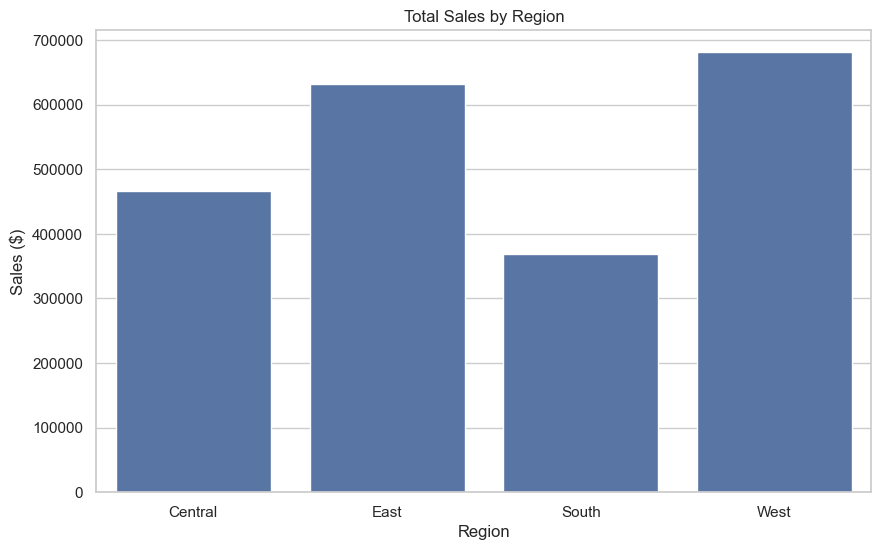

<Figure size 1200x600 with 0 Axes>

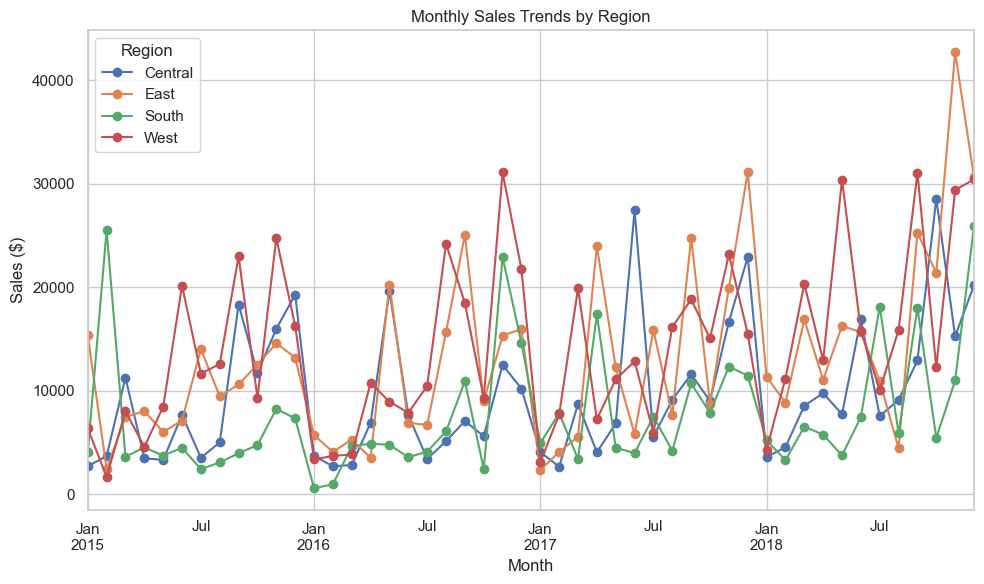

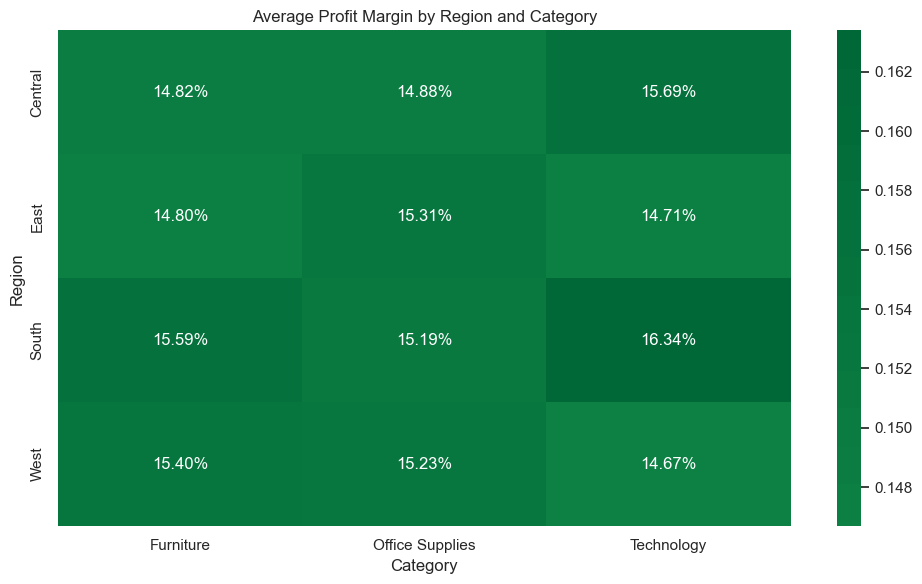

In [69]:
# Bar chart of sales by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=region_sales)
plt.title('Total Sales by Region')
plt.ylabel('Sales ($)')
plt.xticks(rotation=0)
plt.show()

# Line chart of monthly sales trends
plt.figure(figsize=(12, 6))
monthly_sales.T.plot(kind='line', marker='o')
plt.title('Monthly Sales Trends by Region')
plt.ylabel('Sales ($)')
plt.xlabel('Month')
plt.grid(True)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

# Create a heatmap to visualize profit margin by region and category
pivot = df_clean.pivot_table(
    values='Profit Margin %', 
    index='Region', 
    columns='Category',
    aggfunc='mean'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap='RdYlGn', fmt='.2%', center=0)
plt.title('Average Profit Margin by Region and Category')
plt.tight_layout()
plt.show()

# Interactive Analysis with Filtering

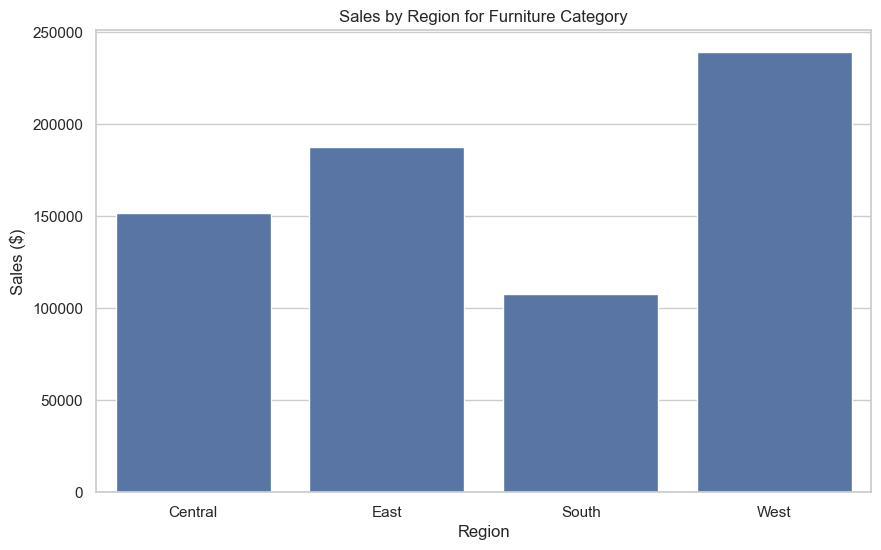

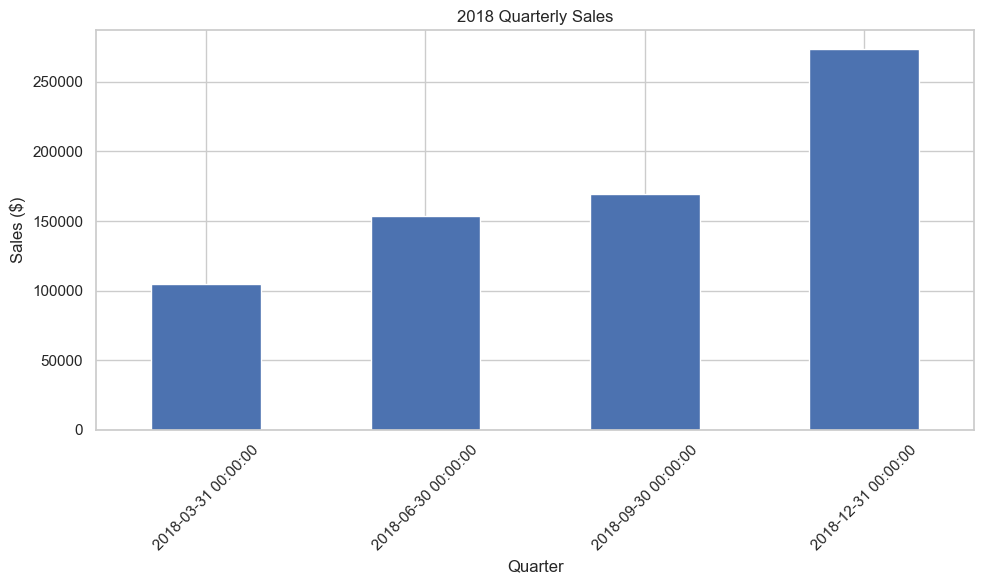

In [72]:
# Filter by Category and visualize (similar to using Slicers in Excel)
category = 'Furniture'  # This could be changed to any category
category_data = df_clean[df_clean['Category'] == category]

# Create a visualization with the filtered data
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=category_data.groupby('Region')['Sales'].sum().reset_index())
plt.title(f'Sales by Region for {category} Category')
plt.ylabel('Sales ($)')
plt.show()

# Time-based filtering (similar to Timeline in Excel)
# Filter for just 2018 data
year_2018 = df_clean[df_clean['Order Date'].dt.year == 2018]
quarterly_sales = year_2018.groupby([pd.Grouper(key='Order Date', freq='Q')])['Sales'].sum()

plt.figure(figsize=(10, 6))
quarterly_sales.plot(kind='bar')
plt.title('2018 Quarterly Sales')
plt.ylabel('Sales ($)')
plt.xlabel('Quarter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Advanced Analysis (Going Beyond Excel)

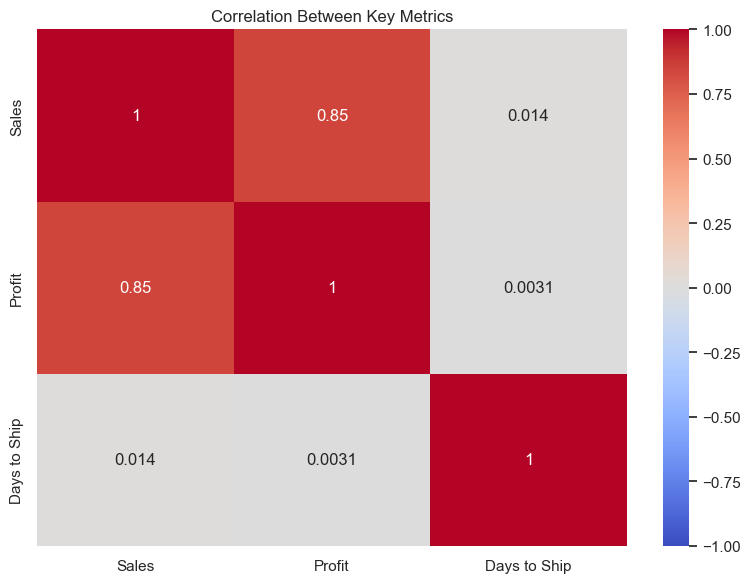

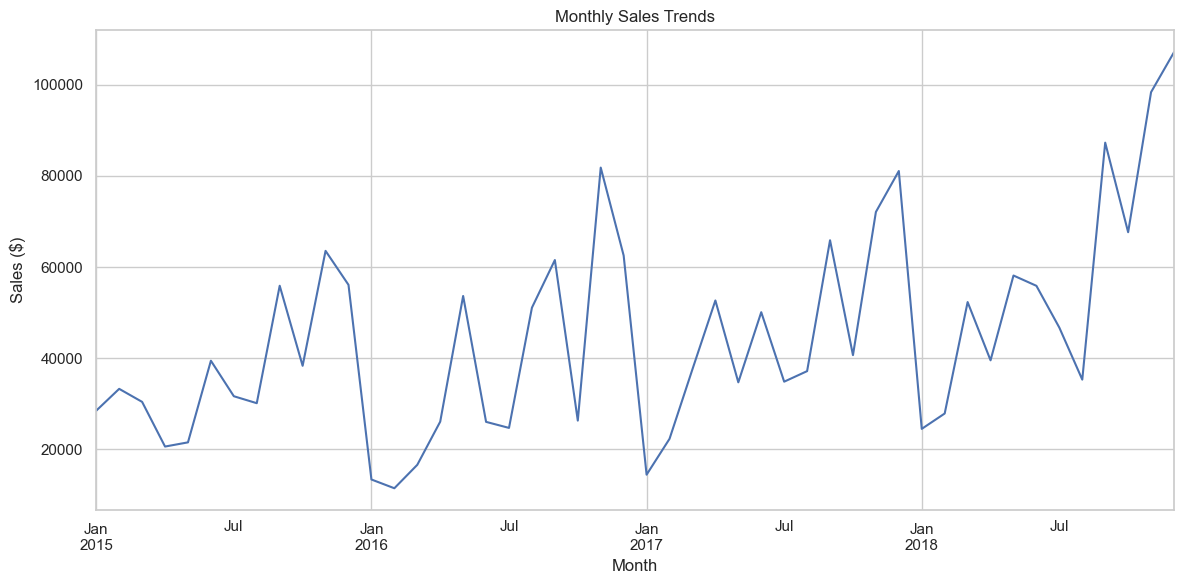

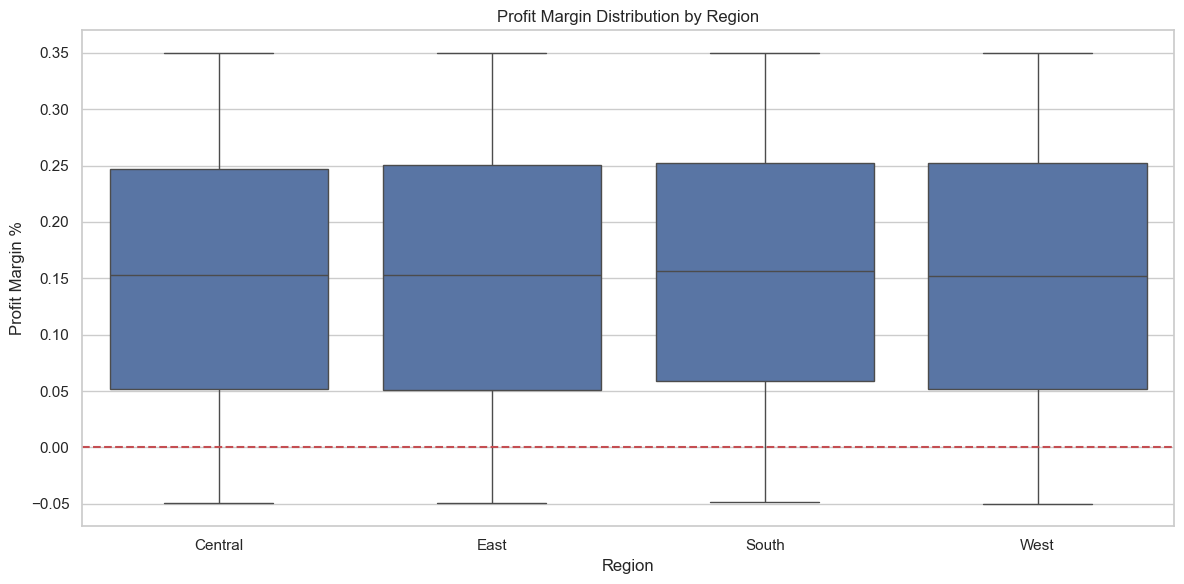

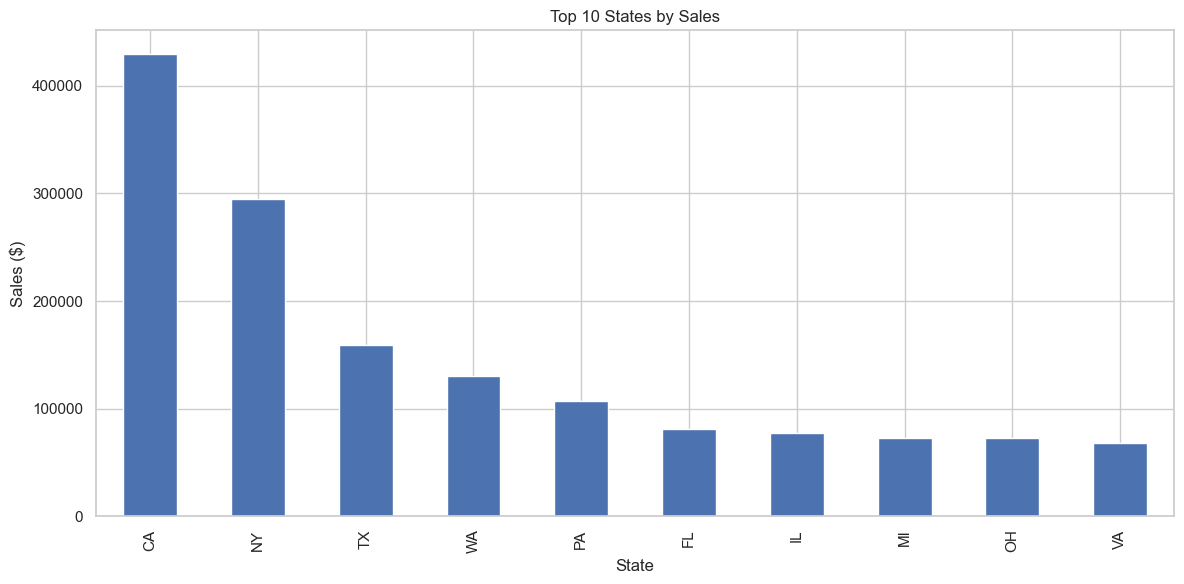

In [75]:
# Calculate correlation between sales, profit, and shipping days
correlation = df_clean[['Sales', 'Profit', 'Days to Ship']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Key Metrics')
plt.tight_layout()
plt.show()

# Time series decomposition to identify trends and seasonality
# For simplicity, let's look at monthly sales trends
monthly_totals = df_clean.groupby(df_clean['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_totals.index = monthly_totals.index.to_timestamp()

plt.figure(figsize=(12, 6))
monthly_totals.plot()
plt.title('Monthly Sales Trends')
plt.ylabel('Sales ($)')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

# Create regional profit margin distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Profit Margin %', data=df_clean)
plt.title('Profit Margin Distribution by Region')
plt.ylabel('Profit Margin %')
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

# New analysis: Sales performance by State
state_performance = df_clean.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
state_performance.plot(kind='bar')
plt.title('Top 10 States by Sales')
plt.ylabel('Sales ($)')
plt.xlabel('State')
plt.tight_layout()
plt.show()